Web & Social Analytics - Final Project

                        - Sandhya

In [1]:
# importing module(s) into namespace
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
pathname = 'C:/Users/email/Documents/'
pd.set_option('display.max_colwidth', 1500) # maximum column for getting all the text


In [2]:
import tweepy
from tweepy import OAuthHandler

#These keys will be different for everyone
consumer_key =  'EmP3ZLcBC75CDCLtn7BbyLi3m'
consumer_secret = 'aKrQyHLgNrJFAI3ycFq9qBCBYt92zclafpb3EM2TEJCFi6woOL'
access_token= '3453584954-mzTjUu9GmwX84MATzIxMTEfQKc5Xci0Ooyk6oKU'
access_secret= 'bcBBYpwx2GUdDNItzGYs8zKXwXGuFSH4cNIBMVHH6Vklc'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 


api = tweepy.API(auth)
user = api.me()
print (user.name)

Sandhya suman


In [3]:
# pull your tweets from your feed.  
for status in tweepy.Cursor(api.user_timeline).items(10):
    # Process a single status
    print(status.text) 

@RockhurstU beautiful red tulips!
Marketing strategies are still to go @RockhurstU BIA6303


In [4]:
# A SearchResults object isn't very helpful, how about a list
results = []

#Get the first 300 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23Nissan',lang = "en").items(300):
    results.append(tweet)

# Verify the number of items returned
print(type(results))
print(len(results))
# got only 188 tweets

<class 'list'>
300


In [5]:
# Create a function to convert a given list of tweets into a Pandas DataFrame.
# The DataFrame will consist of only some values

import pandas as pd 

def toDataFrame(tweets):

    DataSet = pd.DataFrame()

   
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetSource'] = [tweet.source for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['len'] = [len(tweet.text) for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userDesc'] = [tweet.user.description for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]
    DataSet['userLocation'] = [tweet.user.location for tweet in tweets]
    

    return DataSet

In [6]:
#let's use the function with our list
#Pass the tweets list to the above function to create a DataFrame
tweet_frame = toDataFrame(results)
print(tweet_frame.shape)

(300, 11)


In [7]:
tweet_frame['tweetText'][0:10]

0        Happy Wednesday! Our service specials are available until 5/31! Click on the link below to get great offers from ev… https://t.co/Ku0bDH719R
1                                                                     Spicy Nissan 💨🔥🔥\n#nissan #350z #370z #sportcar #beasty https://t.co/FkrctipC7W
2        Nissan has developed automated office chairs that self-park themselves when activated by a clap. Behold, lazy human… https://t.co/DdH2tXhAaA
3      RT @ChuckyDrax: I’m officially a part of The Nobeds! @BlackPanthaaYT \n\n#blackpanthaa #thenobeds #speedymag #nissan #merch https://t.co/EZcD…
4              2014 Nissan Pathfinder AWD SV - R.Start, Htd Steering, Htd Seats, B.Tooth\nhttps://t.co/4liW4dLTkl\n#Winnipeg… https://t.co/d9BmvinKld
5                                                        Which should you buy: the 2019 #Toyota Camry or 2019 #Nissan Altima? https://t.co/ksbcR2BGKr
6                  RT @Nissan: April showers, May flowers, you know the drill. #TueZday #Nissan #370

In [9]:
tweet_frame.head()
# Exporting the data as csv file
#tweet_frame[0:300].to_csv('C:/Users/email/OneDrive/Documents/Sandhya/Web&Social Analytics/Nissan2.csv', encoding='utf-8')

In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pathname = 'C:/Users/email/Documents/'
pd.set_option('display.max_colwidth', 1500) # maximum column for getting all the text

# Importing csv file
pathname = 'C:/Users/email/OneDrive/Documents/Sandhya/Web&Social Analytics/'
tweetdf = pd.read_csv(pathname + "Nissan2.csv", index_col = 0) 
print(tweetdf.shape)
print(list(tweetdf)) #columns of a data frame
print(tweetdf['tweetText'][:6])

(300, 11)
['tweetText', 'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'len', 'userName', 'userDesc', 'userFollowerCt', 'userFriendsCt', 'userLocation']
0      Happy Wednesday! Our service specials are available until 5/31! Click on the link below to get great offers from ev… https://t.co/Ku0bDH719R
1                                                                   Spicy Nissan 💨🔥🔥\n#nissan #350z #370z #sportcar #beasty https://t.co/FkrctipC7W
2      Nissan has developed automated office chairs that self-park themselves when activated by a clap. Behold, lazy human… https://t.co/DdH2tXhAaA
3    RT @ChuckyDrax: I’m officially a part of The Nobeds! @BlackPanthaaYT \n\n#blackpanthaa #thenobeds #speedymag #nissan #merch https://t.co/EZcD…
4            2014 Nissan Pathfinder AWD SV - R.Start, Htd Steering, Htd Seats, B.Tooth\nhttps://t.co/4liW4dLTkl\n#Winnipeg… https://t.co/d9BmvinKld
5                                                      Which should you buy: the 2019 

## Exploratory Data Analysis : 
Starting with statistics and visuals of the data
Next is Number of characters counted;Removal of Punctuation; Use of count vectorizer with different parameters to view top ten tokens, Added Customized stop words; 
Finally, sentiment analysis is performed using Affin dictionary provided in Text-Mining course.

In [62]:
# Number of Tweets
print('Total Number of extracted Tweets on Nissan Twitter:', len(tweetdf))
#average length over all tweets:
print('Average Length over all tweets:', np.mean(tweetdf['len']))
# Total amount of likes out of the tweets
print('Total Amount of Likes:', np.sum(tweetdf['tweetFavoriteCt']))
# maximum number of likes out of the tweets
print('Most Amount of Likes:', np.max(tweetdf['tweetFavoriteCt']))
# Total amount of retweets
print('Total Amount of Retweets:', np.sum(tweetdf['tweetRetweetCt']))
# maximum number of the retweets
print('Most Amount of Retweets:', np.max(tweetdf['tweetRetweetCt']))


Total Number of extracted Tweets on Nissan Twitter: 300
Average Length over all tweets: 133.41
Total Amount of Likes: 354
Most Amount of Likes: 262
Total Amount of Retweets: 4722
Most Amount of Retweets: 78


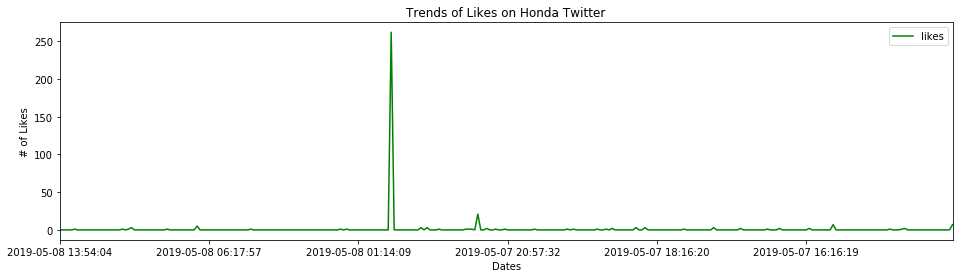

In [31]:
time_likes = pd.Series(data=tweetdf['tweetFavoriteCt'].values, index=tweetdf['tweetCreated'])
time_likes.plot(figsize=(16, 4), color='g', label="likes", legend=True)
plt.title('Trends of Likes on Honda Twitter')
plt.xlabel('Dates')
plt.ylabel('# of Likes')
plt.show()


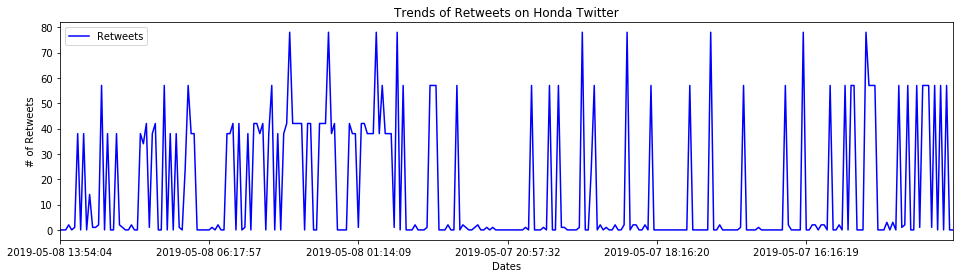

In [32]:
time_likes = pd.Series(data=tweetdf['tweetRetweetCt'].values, index=tweetdf['tweetCreated'])
time_likes.plot(figsize=(16, 4), color='b', label="Retweets", legend=True)
plt.title('Trends of Retweets on Honda Twitter')
plt.xlabel('Dates')
plt.ylabel('# of Retweets')
plt.show()

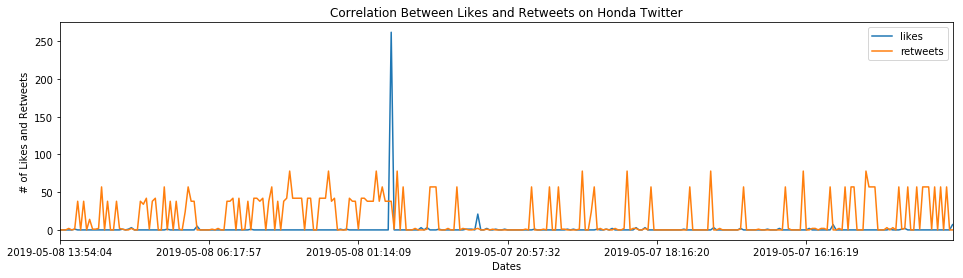

In [33]:
time_likes = pd.Series(data=tweetdf['tweetFavoriteCt'].values, index=tweetdf['tweetCreated'])
time_likes.plot(figsize=(16, 4), label="likes", legend=True)

time_retweets = pd.Series(data=tweetdf['tweetRetweetCt'].values, index=tweetdf['tweetCreated'])
time_retweets.plot(figsize=(16, 4), label="retweets", legend=True)
plt.title('Correlation Between Likes and Retweets on Honda Twitter')
plt.xlabel('Dates')
plt.ylabel('# of Likes and Retweets')
plt.show()

#### Number of characters
Let's check number of words in each tweet. The basic intuition behind this is that generally, the negative sentiments contain a lesser amount of words than the positive ones.

In [34]:
tweetdf['char_count'] = tweetdf['tweetText'].str.len() ## this also includes spaces
tweetdf[['tweetText','char_count']].head()

,tweetText,char_count
0,Happy Wednesday! Our service specials are available until 5/31! Click on the link below to get great offers from ev… https://t.co/Ku0bDH719R,140
1,Spicy Nissan 💨🔥🔥\n#nissan #350z #370z #sportcar #beasty https://t.co/FkrctipC7W,78
2,"Nissan has developed automated office chairs that self-park themselves when activated by a clap. Behold, lazy human… https://t.co/DdH2tXhAaA",140
3,RT @ChuckyDrax: I’m officially a part of The Nobeds! @BlackPanthaaYT \n\n#blackpanthaa #thenobeds #speedymag #nissan #merch https://t.co/EZcD…,140
4,"2014 Nissan Pathfinder AWD SV - R.Start, Htd Steering, Htd Seats, B.Tooth\nhttps://t.co/4liW4dLTkl\n#Winnipeg… https://t.co/d9BmvinKld",132


#### The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. 
Therefore removing all instances of it will help us reduce the size of the tweet data.

In [35]:
# Removing punctuation

# https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# following code is borrowed from above link

import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


In [36]:
# applying the above function to tweetdf['tweetText] and keeping into tweetdf['punctuated']

tweetdf['tweetText'] = tweetdf['tweetText'].map(lambda x:strip_all_entities(strip_links(x)))
   
print(tweetdf['tweetText'][0:6])

0    Happy Wednesday Our service specials are available until 5 31 Click on the link below to get great offers from ev…
1                                                                                                      Spicy Nissan 💨🔥🔥
2    Nissan has developed automated office chairs that self park themselves when activated by a clap Behold lazy human…
3                                                                              RT I’m officially a part of The Nobeds …
4                                                  2014 Nissan Pathfinder AWD SV R Start Htd Steering Htd Seats B Tooth
5                                                                    Which should you buy the 2019 Camry or 2019 Altima
Name: tweetText, dtype: object


In [37]:
# Now removing apostrophe and quotation marks 

tweetdf['tweetText'] = tweetdf['tweetText'].str.replace('[^\w\s]','')

   
print(tweetdf['tweetText'][0:10])

0    Happy Wednesday Our service specials are available until 5 31 Click on the link below to get great offers from ev
1                                                                                                        Spicy Nissan 
2    Nissan has developed automated office chairs that self park themselves when activated by a clap Behold lazy human
3                                                                               RT Im officially a part of The Nobeds 
4                                                 2014 Nissan Pathfinder AWD SV R Start Htd Steering Htd Seats B Tooth
5                                                                   Which should you buy the 2019 Camry or 2019 Altima
6                                                 RT April showers May flowers you know the drill  amp  yaneura no z34
7                                                                                            Musical chairs at s and s
8                                               

Finally, I've got my cleaned data as we know all these pre-processing steps are essential and help us in reducing our vocabulary clutter so that the features produced in the end are more effective. 

In [38]:
# let's see the changed data frame
print(tweetdf.shape)
print(list(tweetdf))
#tweetdf['cleanedText'] # appended the results into original data frame data frame 

(300, 12)
['tweetText', 'tweetRetweetCt', 'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'len', 'userName', 'userDesc', 'userFollowerCt', 'userFriendsCt', 'userLocation', 'char_count']


Now, moving towards Bag of Words - Vectorization. Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

In [39]:
# Instantiating the count vectorizer with all default parameter settings

# Default settings – binary= False, lowercase = True, stop_words = None, max_df =1.0, min_df = 1. 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(binary=False) 

#apply the transformation
cv_default = cv.fit_transform(tweetdf['tweetText']) # bag of words
print(cv_default.shape)

# "bag of words"
names = cv.get_feature_names()
count = np.sum(cv_default.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
count_df = pd.DataFrame(count2, index = names, columns = ['count'])
# following line is getting top 10 features by count instead of alphabetical
count_df.sort_values(['count'], ascending = False)[0:10]  #arrange by count

(300, 995)


,count
the,199
rt,125
and,103
nissan,70
to,69
with,68
you,61
of,49
on,44
drive,40


As we can see the above output, feature space has 1096 features where highest occurring word is 'rt'-102,'the' - 68.
'the','to','is' 'for' words are stop words and not making any sense in our analysis. So we will remove these tokens.

In [40]:
# let's remove sklearn stop words
from sklearn.feature_extraction.text import CountVectorizer

# eliminating skl stop words 
cv1 = CountVectorizer(binary=False, stop_words = "english") 
cv1_skl_stopwords = cv1.fit_transform(tweetdf['tweetText']) # bag of words
print(cv1_skl_stopwords.shape)
names = cv1.get_feature_names()   #create list of feature names
count = np.sum(cv1_skl_stopwords.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
# following line is creating a dataframe consist of count column
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting top 10 features by count instead of alphabetical
count_df.sorted = count_df.sort_values(['count'], ascending = False)[0:10]  


(300, 866)


In [41]:
# feature space
# top ten
#count_df.sort_values(['count'], ascending = False)[:16]
count_df.sorted

,count
rt,125
nissan,70
drive,40
electric,39
amp,38
know,37
motors,36
dual,35
aggressive,35
battery,35


We still see 'rt', adding a customized stop-word to remove it.

In [42]:
#creating a custom stop words list by adding a few terms to the nltk list
 #  import packages for excluding the stopwords
from sklearn.feature_extraction import text 
from nltk.corpus import stopwords
skl_stopwords = text.ENGLISH_STOP_WORDS

#creating an object using the default nltk stopwords
nltk_stopwords = stopwords.words("english") 
# Using sets to do intersections and unions
set_a = set(nltk_stopwords) 
set_b = set(skl_stopwords)
set_c = set(set_a).union(set_b)
remove_words = set(['rt','RT','amp']) 
my_stopwords = set_c.union(remove_words)
# Appending removed my_stopwords in the data frame
tweetdf['tweetText'] = tweetdf['tweetText'].apply(lambda x: " ".join(x for x in x.split() if x not in my_stopwords))
tweetdf['tweetText'][:6]

0         Happy Wednesday Our service specials available 5 31 Click link great offers ev
1                                                                           Spicy Nissan
2    Nissan developed automated office chairs self park activated clap Behold lazy human
3                                                               Im officially The Nobeds
4                   2014 Nissan Pathfinder AWD SV R Start Htd Steering Htd Seats B Tooth
5                                                       Which buy 2019 Camry 2019 Altima
Name: tweetText, dtype: object

In [43]:
# Now eliminaing customized stop words = my_stopwords
cv2 = CountVectorizer(binary=False, stop_words = my_stopwords) 

cv2_custom_stopwords = cv2.fit_transform(tweetdf['tweetText'])
print(cv2_custom_stopwords.shape)
names = cv2.get_feature_names()   #create list of feature names
count = np.sum(cv2_custom_stopwords.toarray(), axis = 0) # add up feature counts 
count2 = count.tolist()  # convert numpy array to list
# following line is creating a dataframe consist of count column
count_df = pd.DataFrame(count2, index = names, columns = ['count']) 
# following line is getting top 20 features by count instead of alphabetical
Top_25_words=count_df.sort_values(['count'], ascending = False)[:25] 

(300, 861)


In [52]:
Top_25_words
# Exporting the top 20 words as csv file
#Top_25_words.to_csv('C:/Users/email/OneDrive/Documents/Sandhya/Web&Social Analytics/top25_Nissan2.csv', encoding='utf-8')

,count
nissan,70
drive,40
electric,39
know,37
motors,36
dual,35
wheel,35
battery,35
aggressive,35
shape,34


In [45]:
# Using afinn dictionaries to assign a value 
afinn = {}
for line in open('C:/Users/email/Downloads/'+"AFINN-111.txt"):
    tt = line.split('\t')
    afinn.update({tt[0]:int(tt[1])})


print(type(afinn), len(afinn))

for key, value in sorted(afinn.items())[0:10]:
    print(key + " => " + str(value))
print("~~~~~~~~~~~~")
for key, value in sorted(afinn.items())[2467:]:
    print(key + " => " + str(value))

<class 'dict'> 2477
abandon => -2
abandoned => -2
abandons => -2
abducted => -2
abduction => -2
abductions => -2
abhor => -3
abhorred => -3
abhorrent => -3
abhors => -3
~~~~~~~~~~~~
yeah => 1
yearning => 1
yeees => 2
yes => 1
youthful => 2
yucky => -2
yummy => 3
zealot => -2
zealots => -2
zealous => 2


In [46]:
# here we are going for strictly the sum:  add up the positives and "subtract" the negatives
# returning a label

def afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in afinn:
            sentcount = sentcount + afinn[word.rstrip('?:!.,;')]
            
    
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment

In [47]:
tweetdf['sentiments'] = tweetdf.tweetText.apply(lambda x: afinn_sent(x))
print(type(tweetdf.tweetText))

<class 'pandas.core.series.Series'>


In [48]:
tweetdf.iloc[0:5][['tweetText','sentiments']]

,tweetText,sentiments
0,Happy Wednesday Our service specials available 5 31 Click link great offers ev,Positive
1,Spicy Nissan,Neutral
2,Nissan developed automated office chairs self park activated clap Behold lazy human,Negative
3,Im officially The Nobeds,Neutral
4,2014 Nissan Pathfinder AWD SV R Start Htd Steering Htd Seats B Tooth,Neutral


In [56]:
tweetdf.iloc[:10][['tweetText','tweetRetweetCt',  'tweetFavoriteCt', 'tweetSource','sentiments']]
#tweetdf[:10]
# Exporting the data as csv file
#tweetdf[0:300].to_csv('C:/Users/email/OneDrive/Documents/Sandhya/Web&Social Analytics/NissanSent2.csv', encoding='utf-8')

,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,sentiments
0,Happy Wednesday Our service specials available 5 31 Click link great offers ev,0,0,Twitter Web Client,Positive
1,Spicy Nissan,0,0,Twitter for iPhone,Neutral
2,Nissan developed automated office chairs self park activated clap Behold lazy human,0,0,TweetDeck,Negative
3,Im officially The Nobeds,2,0,Twitter for iPhone,Neutral
4,2014 Nissan Pathfinder AWD SV R Start Htd Steering Htd Seats B Tooth,0,0,Hootsuite Inc.,Neutral
5,Which buy 2019 Camry 2019 Altima,1,1,TweetDeck,Neutral
6,April showers May flowers know drill yaneura z34,38,0,Twitter Web Client,Neutral
7,Musical chairs,0,0,Buffer,Neutral
8,April showers May flowers know drill yaneura z34,38,0,Twitter Web Client,Neutral
9,Heres pretty sweet GTR came car GT I hu,0,0,Twitter for Android,Positive


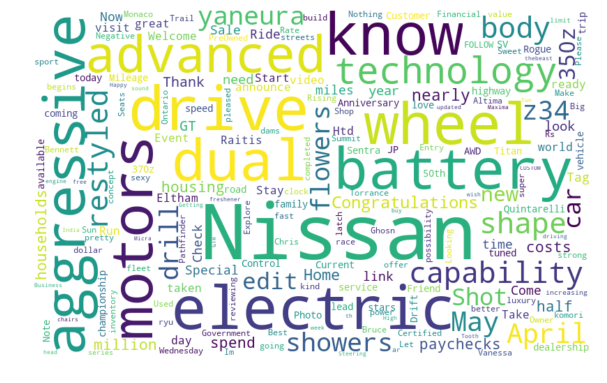

In [54]:
#set.seed(1234)
from wordcloud import WordCloud,STOPWORDS
all_words = ' '.join([text for text in tweetdf['tweetText']])

wordcloud = WordCloud(width=800, height=500, random_state=21,
            max_font_size=110,contour_color= 'black',mode='RGB',background_color='white',collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


### Words that appear darker indicate higher average Engagement

                                    -----------  The End  --------------